# Data Sciences and GIS for Mobility

## Lecture 5 - Classification

So, it's time to learn about Classification models. This notebook will run you through the essential concepts, and give examples on how to run multiple Classification algorithms.


As always, let's do some imports. 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

-----

## Part 1 - Logistic Regression

_The first model of the lecture relates with Logistic Regression. It is important that you understand the mechanics well, because their are applicable in other types of Classification models_

We want you to understand the intuition behind the logit function, so let's work on the basics. Imagine you want to make a function that determines the probability of some event (let's call it x). The "event" x could simply mean that "the input data corresponds to class 1" (in which case, ~x means "the input data corresponds to class 0"). 

So, to plot such a function, let's just create a vector with values between 0 and 1

In [51]:
px=np.arange(0.0001, 1, 0.001)

So, now we determine the odds ratio function

In [52]:
y=px/(1-px)

...and plot it

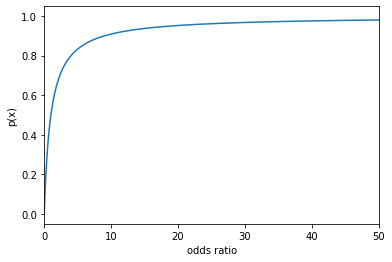

In [53]:
plt.plot(y,px)
plt.xlim([0,50])
plt.xlabel("odds ratio")
plt.ylabel("p(x)");

As said in the class, this function form is not ideal at all. What happens if we apply the log?

In [54]:
y=np.log(px/(1-px))

It will be clear with in plot

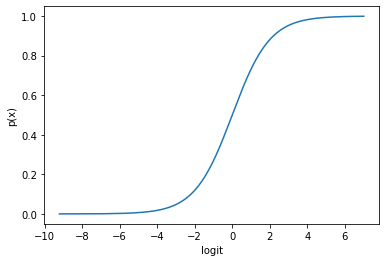

In [55]:
plt.plot(y,px)
#plt.xlim([0,50])
plt.xlabel("logit")
plt.ylabel("p(x)");

ok, now it seems much more balanced, doesn't it? 

Understanding this function is important:
- What is the probability of x (p(x)) when the log odds ratio is 0? 

- What is the odds ratio itself? 

- What about the extremes (when is it 1 and when is it 0?)?

------

Let's start playing with data. First we need to load:

In [56]:
f=pd.read_csv("NYC_taxis_weather_2016_with_dummies.csv")

Take a look at the dataframe yourself

In [57]:
f

,datetime,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,...,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night,is_weekend
0,2016-01-01 00:00:00,162,202.0,307.0,109.0,171.0,198.0,306.0,40.0,54.0,...,0,0,0,0,0,0,0,0,1,False
1,2016-01-01 00:15:00,251,394.0,202.0,162.0,109.0,312.0,198.0,29.0,40.0,...,0,0,0,0,0,0,0,0,1,False
2,2016-01-01 00:30:00,310,420.0,394.0,251.0,162.0,699.0,312.0,16.0,29.0,...,0,0,0,0,0,0,0,0,1,False
3,2016-01-01 00:45:00,338,310.0,420.0,310.0,251.0,482.0,699.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,False
4,2016-01-01 01:00:00,369,403.0,310.0,338.0,310.0,459.0,482.0,2.0,3.0,...,0,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,2016-06-30 22:45:00,316,639.0,624.0,318.0,291.0,406.0,305.0,201.0,189.0,...,0,0,0,0,1,0,0,0,0,False
17468,2016-06-30 23:00:00,299,593.0,639.0,316.0,318.0,347.0,406.0,168.0,201.0,...,0,0,0,0,0,0,0,0,1,False
17469,2016-06-30 23:15:00,283,617.0,593.0,299.0,316.0,252.0,347.0,104.0,168.0,...,0,0,0,0,0,0,0,0,1,False
17470,2016-06-30 23:30:00,276,580.0,617.0,283.0,299.0,246.0,252.0,87.0,104.0,...,0,0,0,0,0,0,0,0,1,False


Yes, the index is no longer the time, let's put it back

In [58]:
f = f.set_index("datetime")

In [59]:
f.head()

,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,temp,...,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,162,202.0,307.0,109.0,171.0,198.0,306.0,40.0,54.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:15:00,251,394.0,202.0,162.0,109.0,312.0,198.0,29.0,40.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:30:00,310,420.0,394.0,251.0,162.0,699.0,312.0,16.0,29.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:45:00,338,310.0,420.0,310.0,251.0,482.0,699.0,3.0,16.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 01:00:00,369,403.0,310.0,338.0,310.0,459.0,482.0,2.0,3.0,40.4,...,0,0,0,0,0,0,0,0,1,False


So, imagine that you are an NYC taxi fleet manager. At each 15 minutes, you goal is to make sure your company has enough cars for very big spikes in demand across the city (like above 90 percentile). If you detect some very big spike in a specific area, you coordinate with the cars in the neighbourhood to go there. 

For this exercise, let's assume that area 1 is the only truly important for you. Doing this manually would be very tiring (if at all possible), so you rely on your Data Science skills to get a model that does it for you:

**At each 15 minutes time interval, predict whether the next time interval will have a demand spike ("stress").**

Let's first find the actual value above which you call it a "stress" situation:

In [60]:
stress_threshold=np.percentile(f['pickups1'], 90)

How many demand pickups exist above percentile 90? And above other percentiles (e.g. percentile 50)?  

In [61]:
len(f[f.pickups1>stress_threshold])

1748

In [62]:
len(f[f.pickups1>np.percentile(f.pickups1, 50)])

8690

Now, let's create a new column (or variable) that is True when it is a "stress" scenario, and False when it is not

In [63]:
f['stress']=f['pickups1'].apply(lambda x: x>stress_threshold)

Do what to inspect this new data that you created? (e.g. use describe(), hist(), etc...)

In [64]:
f.describe()

,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,temp,prcp,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night
count,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.00000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000
mean,197.917182,397.725103,397.708620,197.910256,197.904247,276.813301,276.818910,98.999828,98.995536,51.15000,0.099780,0.049451,0.274725,0.125000,0.125000,0.125000,0.083333,0.166667,0.041667,0.333333
std,105.638241,210.816058,210.811892,105.640104,105.638648,162.654386,162.653703,74.249825,74.250259,15.59174,0.259555,0.216813,0.446389,0.330728,0.330728,0.330728,0.276393,0.372689,0.199832,0.471418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.90000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,223.000000,223.000000,100.000000,100.000000,103.000000,103.000000,10.000000,10.000000,39.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,223.000000,418.000000,418.000000,223.000000,223.000000,331.000000,331.000000,109.000000,109.000000,51.35000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,278.000000,529.000000,529.000000,278.000000,278.000000,397.000000,397.000000,160.000000,160.000000,63.40000,0.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,462.000000,1026.000000,1026.000000,462.000000,462.000000,814.000000,814.000000,323.000000,323.000000,79.60000,1.820000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's now create our model. The first thing to do is to import the sklearn package that has Logistic Regression, and then just create the respective object.

In [65]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(max_iter=100000)

We have a model, but it is "empty", so let's create the training and test sets now. 

We will create the model with 2/3 of the data (training set), and then 1/3 of the data is kept aside for later validation (test set).

In [66]:
split=int(len(f)*2.0/3)
training=f[:split]
test=f[split:]

We need to create the x and y for the training and test set now. Notice that the y is the "target" variable, i.e. our "stress" column, and the x comes from **almost** all other columns. Let's check all columns

In [67]:
training.columns

Index(['pickups1', 'pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2', 'temp', 'prcp', 'fog', 'rain_drizzle',
       'time_of_day_afternoon', 'time_of_day_afternoon rush',
       'time_of_day_evening', 'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush', 'time_of_day_night', 'is_weekend',
       'stress'],
      dtype='object')

Ok, we need to create the x using EVERYTHING but the 'stress' variable, but also we need to remove "pickups1" (**why?**)

Notice also that we have several dummy variables relating to the categorical 'time of day' variable. Recall that in week 3 we discussed the method of dummy variables as a way of including categorical variables as predictors in our model.  In this case, the time of day variable has seven possible values and we created seven dummy variables using the pd.get_dummies() function. In logistic regression when including dumming variables for a categorical variable that takes k values, it recommended to only include k-1 of the dummies and not all k of them. The reason for this is that these k dummy variables sum to 1 leading to multicollinearity (linear dependence), which will make it difficult to interpret the coefficients. Thus, we will arbitrarily exclude the dummy 'time_of_day_night'. It is also important to note that when interpreting the coefficients for these dummy variables you interpret them as measuring an 'effect' relative to the baseline category that you left out (in this case the remaining six dummy variables should be interpreted as measuring effects relative to the 'time_of_day_night'). FYI, in Pandas, we can automatically create k-1 dummies instead of k dummies using the option 'drop_first=False' in the pd.get_dummies() function.

The other methods for classification that we will cover (e.g., SVM, decision trees) are less sensitive to multicollinearity and there you can include all the seven dummies.

In [68]:
x_train=training[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush']]
x_test=test[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush']]

To make sure you understand things, don't forget to ALWAYS play with the code here... For example, what's the content of the new lists x_train and x_test?

In [69]:
x_train[:5].T

datetime,2016-01-01 00:00:00,2016-01-01 00:15:00,2016-01-01 00:30:00,2016-01-01 00:45:00,2016-01-01 01:00:00
pickups17_lag1,202.0,394.0,420.0,310.0,403.0
pickups17_lag2,307.0,202.0,394.0,420.0,310.0
pickups1_lag1,109.0,162.0,251.0,310.0,338.0
pickups1_lag2,171.0,109.0,162.0,251.0,310.0
pickups21_lag1,198.0,312.0,699.0,482.0,459.0
pickups21_lag2,306.0,198.0,312.0,699.0,482.0
pickups28_lag1,40.0,29.0,16.0,3.0,2.0
pickups28_lag2,54.0,40.0,29.0,16.0,3.0
temp,40.4,40.4,40.4,40.4,40.4
prcp,0.03,0.03,0.03,0.03,0.03


In [70]:
x_test[:5].T

datetime,2016-05-01 08:00:00,2016-05-01 08:15:00,2016-05-01 08:30:00,2016-05-01 08:45:00,2016-05-01 09:00:00
pickups17_lag1,144.0,160.0,173.0,183.0,197.0
pickups17_lag2,132.0,144.0,160.0,173.0,183.0
pickups1_lag1,73.0,68.0,65.0,82.0,67.0
pickups1_lag2,50.0,73.0,68.0,65.0,82.0
pickups21_lag1,123.0,160.0,162.0,176.0,231.0
pickups21_lag2,98.0,123.0,160.0,162.0,176.0
pickups28_lag1,12.0,35.0,22.0,33.0,81.0
pickups28_lag2,8.0,12.0,35.0,22.0,33.0
temp,49.0,49.0,49.0,49.0,49.0
prcp,0.0,0.0,0.0,0.0,0.0


...and now the ys are trivial

In [71]:
y_train=training['stress']

y_test=test['stress']

To make sure you understood, do you want to see what's inside these two vectors?

In [72]:
y_train[:5]

datetime
2016-01-01 00:00:00    False
2016-01-01 00:15:00    False
2016-01-01 00:30:00    False
2016-01-01 00:45:00     True
2016-01-01 01:00:00     True
Name: stress, dtype: bool

Ok, we have our Xs and Ys! Ready to go... it's totally trivial with sklearn:

In [73]:
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

Congrats! You trained your first Logistic Regression model. What's its accuracy (**on the test set**)?

In [74]:
LogReg.score(x_test,y_test)

0.9479739010989011

Do you want to try it on the training set? What do you expect?

In [75]:
LogReg.score(x_train, y_train)

0.9550995879120879

If the values tend to be similar, then congrats, it's very likely that your model is not overfitting! :-)



Anyway, accuracy is not everything in a classifier. Another VERY interesting concept is the confusion matrix

In [76]:
from sklearn.metrics import confusion_matrix

To use it properly, let's first obain the predictions of our model using the test set:

In [77]:
ypred=LogReg.predict(x_test)

Now, we can compare the predictions with the observations, using the confusion matrix

In [78]:
confusion_matrix(y_test, ypred)

array([[5086,  150],
       [ 153,  435]], dtype=int64)

...we hope you're not confused!  ;-)

Important: pay attention to the rows and columns in the confusion matrix. The format that Sklearn uses is different from what we had in the slides - the rows represent actual (true) values and the columns represent predicted values.
You can see the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Alternatively, we can also plot the confusion matrix just to be sure:

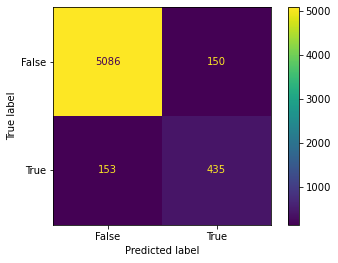

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, x_test, y_test)  

A last useful thing about Logistic Regression. It is a parametric model, so its parameters beta (its "coefficients") can actually mean something. Let's take a look at them:

In [80]:
LogReg.coef_

array([[ 2.74794221e-03, -2.73612828e-03,  4.82917080e-02,
         1.22938053e-02,  3.03649103e-03,  1.18975746e-03,
         1.50325346e-03, -3.17648380e-03,  9.80226428e-03,
        -1.39210199e-01, -8.01974701e-02,  3.98064211e-02,
        -6.00044594e-01, -6.04452294e-01,  1.33639500e+00,
         6.76008996e-01,  2.35303445e-01,  3.42121849e-01,
        -1.25091410e-01]])

This is a bit confusing. Which coefficient corresponds to which variable? Let's make it more interpretable:

In [81]:
for cname, val in zip(x_train.columns, LogReg.coef_.tolist()[0]):
    print("%s=%.3f"%(cname, val))

pickups17_lag1=0.003
pickups17_lag2=-0.003
pickups1_lag1=0.048
pickups1_lag2=0.012
pickups21_lag1=0.003
pickups21_lag2=0.001
pickups28_lag1=0.002
pickups28_lag2=-0.003
temp=0.010
prcp=-0.139
fog=-0.080
rain_drizzle=0.040
is_weekend=-0.600
time_of_day_afternoon=-0.604
time_of_day_afternoon rush=1.336
time_of_day_evening=0.676
time_of_day_lunch time=0.235
time_of_day_morning=0.342
time_of_day_morning rush=-0.125


What do you think of the results? Take a look at the signs. Do they make sense? Try to play with the stress_threshold above (instead of 90 percentile, you can try others...)

------

## Part 2 - Support Vector Machines

See chapter 12 of [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

For the rest of the notebook, we will add the dummy that we left out earlier 'time_of_day_night':

In [82]:
x_train=training[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush','time_of_day_night']]
x_test=test[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush','time_of_day_night']]

In Part 1, we did almost everything for you. But now, we'll just help you with the import:

In [83]:
from sklearn.svm import SVC

Create the object

In [84]:
sv=SVC()

Train the model

In [85]:
sv.fit(x_train,y_train)

SVC()

Check its accuracy

In [86]:
sv.score(x_test, y_test)

0.9433379120879121

Check its confusion matrix

In [87]:
ypred=sv.predict(x_test)
confusion_matrix(y_test, ypred)

array([[5127,  109],
       [ 221,  367]], dtype=int64)

Be critical about it... is it working at all? Before you try playing with the parameters, think about how the model works: it relies HEAVILY on comparing pairs of vectors...

...so when their data is somewhat odd (for example having numeric variables, dummies, variables with different ranges), you need to make sure you get everything comparable. For example, you need to make sure every variable falls in the same range or scale.

Do you want to try?

In [88]:
x_train_standard=(x_train-x_train.mean())/x_train.std()
x_test_standard=(x_test-x_train.mean())/x_train.std() # Remember to use x_train to standardise.

In [89]:
sv.fit(x_train_standard,y_train)

SVC()

In [90]:
sv.score(x_test_standard, y_test)

0.9436813186813187

In [91]:
ypred_standard=sv.predict(x_test_standard)
confusion_matrix(y_test, ypred_standard)

array([[5121,  115],
       [ 213,  375]], dtype=int64)

----

## Part 3 - Decision Trees

See chapter 9.2 of [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

Here is the Decision Tree object import:

In [92]:
from sklearn.tree import DecisionTreeClassifier

Create the object

In [93]:
dt=DecisionTreeClassifier()

Train the model

In [94]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Check accuracy

In [95]:
dt.score(x_test,y_test)

0.9259958791208791

Check confusion matrix

In [96]:
ypred=dt.predict(x_test)
confusion_matrix(y_test, ypred)

array([[4966,  270],
       [ 161,  427]], dtype=int64)

Now, try a random forest. Can you find where it is in sklearn?

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

0.9478021978021978


In [98]:
ypred=rf.predict(x_test)
confusion_matrix(y_test, ypred)

array([[5114,  122],
       [ 182,  406]], dtype=int64)